Data analysis and prediction using logistic Regression on IPL  dataset  (matches) 


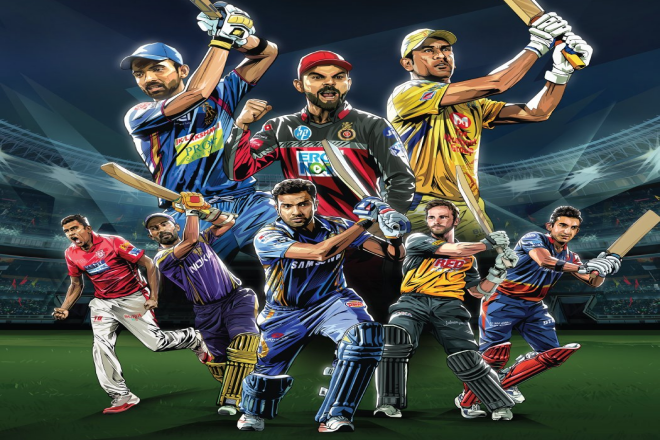

Importing required libraries

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import numpy
import seaborn as sns
import random
%matplotlib inline
import plotly.express as px


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Reading the data from csv to the dataframe using pandas

In [ ]:
 df=pd.read_csv("/kaggle/input/ipl-complete-dataset-20082020/IPL Matches 2008-2020.csv") 

Show all the coulmns present in the dataset

In [ ]:
df.head()  #shows the mathes dataset


In [ ]:
df['date']= pd.to_datetime(df['date'])
df['season'] = pd.DatetimeIndex(df['date']).year  #extract season (year) from the date and add another colmn in dataframe
df.head()

In [ ]:
df.isnull().sum() # find total  number of nulls in each column


In [ ]:
df.info() 

Removing the descripencies and properly structuring the datavalues

In [ ]:
df.city.unique()  #get the unique values to remove the descripencies

In [ ]:
df.city.replace({"Bangalore":"Bengaluru"}, inplace = True)

In [ ]:
df.city.unique()

In [ ]:
df.city.replace({'Bengaluru':1,
                 'Chandigarh':2,
                  'Delhi':3,
                 'Mumbai':4,
                 'Kolkata':5,
                 'Jaipur':6,
                 'Hyderabad':7,
                 'Chennai':8,
                 'Cape Town':9,
                 'Port Elizabeth':10,
                 'Durban':11,
                 'Centurion':12,
                 'East London':13,
                 'Johannesburg':14, 
                 'Kimberley':15,
                'Bloemfontein':16,
                 'Ahmedabad':17, 
                 'Cuttack':18,
                 'Nagpur':19,
                 'Dharamsala':20,
                 'Kochi':21,
                 'Indore':22,
                 'Visakhapatnam':23,
                 'Pune':24,
                 'Raipur':25,
                 'Ranchi':26,
                 'Abu Dhabi':27,
                 'Rajkot':28, 'Kanpur':29, 'Dubai':30, 'Sharjah':31},inplace=True)

In [ ]:
df.head()

In [ ]:
df.venue.unique()

In [ ]:
df.venue.replace({'Feroz Shah Kotla Ground':'Feroz Shah Kotla',
                    'M Chinnaswamy Stadium':'M. Chinnaswamy Stadium',
                    'MA Chidambaram Stadium, Chepauk':'M.A. Chidambaram Stadium',
                     'M. A. Chidambaram Stadium':'M.A. Chidambaram Stadium',
                     'Punjab Cricket Association IS Bindra Stadium, Mohali':'Punjab Cricket Association Stadium',
                     'Punjab Cricket Association Stadium, Mohali':'Punjab Cricket Association Stadium',
                     'IS Bindra Stadium':'Punjab Cricket Association Stadium',
                    'Rajiv Gandhi International Stadium, Uppal':'Rajiv Gandhi International Stadium',
                    'Rajiv Gandhi Intl. Cricket Stadium':'Rajiv Gandhi International Stadium'},inplace=True)

In [ ]:
df.venue.unique()

In [ ]:
df.isnull()

#   **Exploratory Data Analysis**

we can do some exploratory data analysis.

*We can use seaborn to create a simple heatmap to see where we are missing data!*

In [ ]:
null1=sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')#heatmap to show the missing values
null1.set_title("all null values")  

All yellow colored lines represent missing values and the columns are shown in x axis 
missing values are present in column city,result_margin and menthod

Let us do some analysis

the below countplot shows the number of wins of each team 
and based on the graph we can undertand which team has highest number of wins

In [ ]:
sns.set_style('whitegrid')
ax=sns.countplot(x='winner',data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

1. here we can understand that mumbai indians have highest number of wins

The below countplot shows  wins based on the toss_decision

In [ ]:
sns.set_style('whitegrid')
ax=sns.countplot(x='winner',hue='toss_decision',data=df,palette='rainbow')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

In [ ]:
def winner_on_toss(name_of_the_team):
    match_winner = df[(df['toss_winner']==name_of_the_team) & (df['winner']==name_of_the_team)]
    winner_counts = match_winner['toss_decision'].value_counts()
    total_count=winner_counts['field']+winner_counts['bat']
    winner_when_bat = winner_counts['bat']/total_count*100
    winner_when_feild = winner_counts['field']/total_count*100
    print("Total fielding count = "+ str(winner_counts['field']))
    print("total batting count = " + str(winner_counts['bat']))
    print("percentage win when batting was choosen = " + str(winner_when_bat))
    print("percentage win when fielding was choosen = " + str(winner_when_feild))

    data = [['Fielding',  winner_when_feild], ['Batting', winner_when_bat]]
    data = pd.DataFrame (data,columns=['Decision','Win_%age'])
    return(px.pie( data , values= 'Win_%age' , names='Decision', title='percentage win of '+ name_of_the_team  + ' on basis of  toss decision',color_discrete_sequence=px.colors.sequential.Rainbow))

            
name_of_the_team="Mumbai Indians"  #can use "iput" for user input
plot =  winner_on_toss(name_of_the_team)
plot

Data cleaning 

Below function will fill the city in the database based on the venue and no null values will be here in city

In [ ]:
def find_city(cols):
    city=cols[0]
    venue=cols[1]
    
    if pd.isnull(city):
        if venue=="M. Chinnaswamy Stadium" or venue=="M.Chinnaswamy Stadium":
           return 1
        elif venue=="Punjab Cricket Association Stadium":
           return 2
        elif venue=="Feroz Shah Kotla":
           return 3
        elif venue=='Wankhede Stadium':
           return 4
        elif venue=="Eden Gardens":
           return 5
        elif venue=="Sawai Mansingh Stadium":
           return 6
        elif venue=="Rajiv Gandhi International Stadium":
           return 7
        elif venue=="M.A. Chidambaram Stadium":
           return 8
        elif venue=="Dr DY Patil Sports Academy":
           return 4
        elif venue=="Newlands":
           return 9
        elif venue=="St George's Park":
           return 10
        elif venue=="Kingsmead":
           return 11
        elif venue=="SuperSport Park":
           return 12
        elif venue=="Buffalo Park":
           return 13
        elif venue=="New Wanderers Stadium":
           return 14
        elif venue=="De Beers Diamond Oval":
           return 15
        elif venue=="OUTsurance Oval":
           return 16
        elif venue=="Brabourne Stadium":
           return 4
        elif venue=="Sardar Patel Stadium, Motera":
           return 17
        elif venue=="Barabati Stadium":
           return 18
        elif venue=="Vidarbha Cricket Association Stadium, Jamtha":
           return 19
        elif venue=="Himachal Pradesh Cricket Association Stadium":
           return 20
        elif venue=="Nehru Stadium":
          return 21
        elif venue=="Holkar Cricket Stadium":
          return 22
        elif venue=="Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium":
          return 23
        elif venue=="Subrata Roy Sahara Stadium":
          return 24
        elif venue=="Shaheed Veer Narayan Singh International Stadium":
          return 25
        elif venue=="JSCA International Stadium Complex":
          return 26
        elif venue=="Sheikh Zayed Stadium":
          return 27
        elif venue=="Sharjah Cricket Stadium":
          return 31
        elif venue=="Dubai International Cricket Stadium":
          return 30
        elif venue=="Maharashtra Cricket Association Stadium":
          return 24
        elif venue=="Saurashtra Cricket Association Stadium":
          return 28
        elif venue=="Green Park":
          return 29
        
    else :
            return city
        
       
        
        
        

In [ ]:
df['city'] = df[['city','venue']].apply(find_city,axis=1)

the below heatmap shows that the null values in city are filled now 

In [ ]:
null1=sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
null1.set_title("all null values")

In [ ]:
df.isnull().sum() #total null values in particular column

Dropping the unwanted column

In [ ]:
df.drop('method',axis=1,inplace=True)

In [ ]:
null1=sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
null1.set_title("all null values")

considering only values which are not null from result_margin

In [ ]:
df = df[df['result_margin'].notna()]

In [ ]:
null1=sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
null1.set_title("all null values")

In [ ]:
def player_MOM_for_teams(player_name):
    for value in df.groupby('player_of_match'):
        if value[0] == player_name:
            return value[1]['winner'].value_counts()


player_name = "MEK Hussey" #can use "iput" for user input
df1 = player_MOM_for_teams(  player_name  ).to_frame().reset_index().rename(columns = {'index' : 'Team' , 'winner' : 'Count'})
df1

In [ ]:
df.head()

Manually encoding the columns

In [ ]:
df.team1.unique()

In [ ]:
df.team1.replace({'Royal Challengers Bangalore':1,
                 'Kings XI Punjab':2,
                 'Delhi Daredevils':3,
                 'Mumbai Indians':4,
                 'Kolkata Knight Riders':5,
                 'Rajasthan Royals':6,
                 'Deccan Chargers':7,
                 'Chennai Super Kings':8,
                 'Kochi Tuskers Kerala':9,
                 'Pune Warriors':10,
                 'Sunrisers Hyderabad':11,
                 'Gujarat Lions':12,
                 'Rising Pune Supergiants':13,
                 'Rising Pune Supergiant':13,
                 'Delhi Capitals':14},inplace=True)

In [ ]:
df.team2.replace({'Royal Challengers Bangalore':1,
                 'Kings XI Punjab':2,
                 'Delhi Daredevils':3,
                 'Mumbai Indians':4,
                 'Kolkata Knight Riders':5,
                 'Rajasthan Royals':6,
                 'Deccan Chargers':7,
                 'Chennai Super Kings':8,
                 'Kochi Tuskers Kerala':9,
                 'Pune Warriors':10,
                 'Sunrisers Hyderabad':11,
                 'Gujarat Lions':12,
                 'Rising Pune Supergiants':13,
                 'Rising Pune Supergiant':13,
                 'Delhi Capitals':14},inplace=True)

In [ ]:
df.winner.replace({'Royal Challengers Bangalore':1,
                 'Kings XI Punjab':2,
                 'Delhi Daredevils':3,
                 'Mumbai Indians':4,
                 'Kolkata Knight Riders':5,
                 'Rajasthan Royals':6,
                 'Deccan Chargers':7,
                 'Chennai Super Kings':8,
                 'Kochi Tuskers Kerala':9,
                 'Pune Warriors':10,
                 'Sunrisers Hyderabad':11,
                 'Gujarat Lions':12,
                 'Rising Pune Supergiants':13,
                 'Rising Pune Supergiant':13,
                 'Delhi Capitals':14},inplace=True)

In [ ]:
df.toss_winner.replace({'Royal Challengers Bangalore':1,
                 'Kings XI Punjab':2,
                 'Delhi Daredevils':3,
                 'Mumbai Indians':4,
                 'Kolkata Knight Riders':5,
                 'Rajasthan Royals':6,
                 'Deccan Chargers':7,
                 'Chennai Super Kings':8,
                 'Kochi Tuskers Kerala':9,
                 'Pune Warriors':10,
                 'Sunrisers Hyderabad':11,
                 'Gujarat Lions':12,
                 'Rising Pune Supergiants':13,
                 'Rising Pune Supergiant':13,
                 'Delhi Capitals':14},inplace=True)

In [ ]:
df['date'] = pd.to_datetime(df['date'])
lis = []
for value in df.groupby('season'):
    lis.append( [value[0] , str(value[1].head(1).reset_index().date.dt.date[0]) , str(value[1].tail(1).reset_index().date.dt.date[0]) ] ) #gives start and end date of the season

date_info = pd.DataFrame( lis , columns = ['Season' , 'Start Date' , 'End Date'])
date_info

Dropping unwanted columns

In [ ]:
df.drop(['id','date','player_of_match','result','eliminator','umpire1','umpire2','venue','toss_decision'],axis=1,inplace=True)

Building a Logistic Regression model

In [ ]:
train=df
train

In [ ]:
from sklearn.model_selection import train_test_split   #traing  and testing 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('winner',axis=1), 
                                                    train['winner'], test_size=0.30, 
                                                    random_state=101)

In [ ]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
logmodel = LogisticRegression(max_iter=10000)
logmodel.fit(X_train,y_train)

In [ ]:
logmodel.score(X_train,y_train)

In [ ]:
predictions = logmodel.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
accuracy=confusion_matrix(y_test,predictions)

In [ ]:
accuracy

In [ ]:

from sklearn.metrics import accuracy_score

In [ ]:

accuracy=accuracy_score(y_test,predictions)
accuracy

In [ ]:

predictions

In [ ]:
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

In [ ]:
print(classification_report(y_test,predictions))